In [54]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt




In [55]:


#read CSV
df_control = pd.read_csv('https://static-content.springer.com/esm/art%3A10.1186%2F1476-072X-10-29/MediaObjects/12942_2011_429_MOESM1_ESM.TXT', sep= '\t', header=None)
df_cases = pd.read_csv('https://static-content.springer.com/esm/art%3A10.1186%2F1476-072X-10-29/MediaObjects/12942_2011_429_MOESM2_ESM.TXT' , sep = '\t',header=None)


  


In [56]:
##################################data pre-processing#############################
df_control.columns = ['id','x','y']
df_control.set_index('id', inplace=True)

df_cases.columns = ['id','x','y','label','date']
df_cases.set_index('id', inplace=True)
df_cases.date = pd.to_datetime(df_cases.date,format="%d-%b-%y")
df_cases.sort_values('date', inplace=True)
df_cases.set_index(np.arange(57), inplace=True)
#for frist analysis let's remove date and label columns
#df_cases_short = df_cases.copy()
#df_cases_short.drop(columns=['label','date'], inplace=True)
##############################end of data pre-processing##########################

#calculate distance between points
dist = distance_matrix(df_cases_short, df_cases_short)
dist = pd.DataFrame(dist)

#remove zeros from dist dataframe
dist= dist[dist!=0]

#calculate variance
vet_var = np.arange(df_cases.shape[0])
vet_idx = []
for i in range(df_cases.shape[0]):
    index = np.where(np.isclose(dist[i] ,dist[i].min()))
    #print(index)
    #print(dist[index[0][0]][i])
    #vet_idx[index[0][0]].append(dist[index[0][0]][i])
    vet_idx.append(dist[index[0][0]][i])




In [57]:
#calculate distance between points
dist = distance_matrix(df_cases[['x','y']], df_cases[['x','y']])
max_dist = dist.max()
radius = max_dist * 0.2
radius = round(radius,2)


In [58]:
#display predicted scores by the model as a contour plot
x = np.linspace(0,700,1000,endpoint=False)
y = np.linspace(0, 750,1000,endpoint=False)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

In [59]:

#creating components
components = []
for i in range(df_cases.shape[0]):  
    components.append(multivariate_normal.pdf(XX, mean=[df_cases.x[i],df_cases.y[i]], cov=960))
    components[i] = components[i].reshape(X.shape)

#adding components    
summation = np.zeros((1000,1000))
for i in range(df_cases.shape[0]):   
    summation = summation + components[i]
    
#normalize summation
s_max = np.max(summation)
s_min = np.min(summation)
s_norm = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        s_norm[i][j] = (1-0)*(summation[i][j]-s_min)/(s_max - s_min)+0 

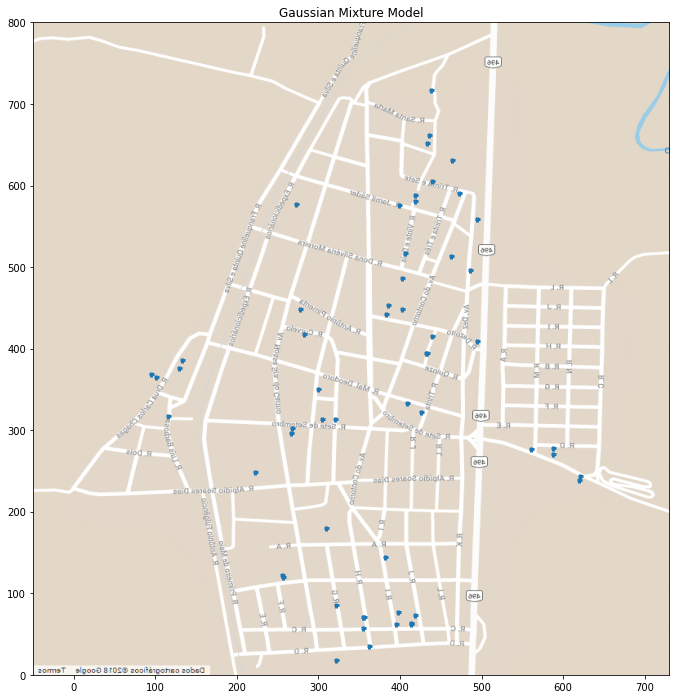

In [ ]:
figure, ax = plt.subplots(figsize = (14,12))
img = plt.imread("https://github.com/Leilisson/Data_Science/blob/master/Capstone_Project/mapflip.png?raw=true")

ax.imshow(img, extent=[-50, 730, 0, 800])

ax.plot(df_cases.x,df_cases.y,'+', markersize=5, mew=3,)
ax.set_title('Gaussian Mixture Model')
#ax.contour(X, Y, summation)
plt.show()
#plt.savefig('books_read.png')



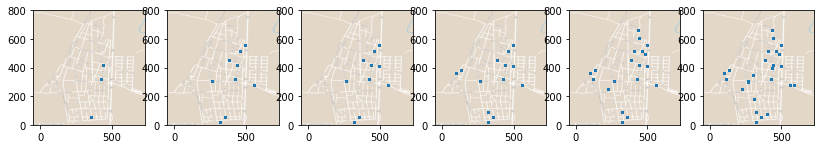

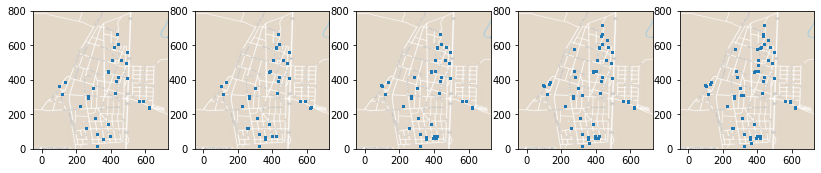

In [102]:
figure, ax = plt.subplots(1,6,figsize=(14,12))
img = plt.imread('https://github.com/Leilisson/Data_Science/blob/master/Capstone_Project/mapflip.png?raw=true')

figure2, ax2 = plt.subplots(1,5,figsize=(14,12))

cont_dt = df_cases.date[0]
ax_line = 0


for i in range(df_cases.shape[0]):
  if (cont_dt + np.timedelta64(14,'D')) <= df_cases.date[i]:
    cont_dt = df_cases.date[i-1] + np.timedelta64(1,'D')
    if ax_line<6:
      ax[ax_line].plot(df_cases.x[0:i],df_cases.y[0:i],'+', markersize=2, mew=3,)
      ax[ax_line].imshow(img,extent=[-50, 730, 0, 800])
    else:
      ax2[ax_line - 6].plot(df_cases.x[0:i],df_cases.y[0:i],'+', markersize=2, mew=3,)
      ax2[ax_line - 6].imshow(img,extent=[-50, 730, 0, 800])
    ax_line +=1
    

